# Basics of Machine Learning - Part 1

<hr style="border:2px solid gray">

# Outline: <a name="index"></a>

0. [Preliminaries: Recommended Books](#preliminaries)
1. [Common Terms in Machine Learning](#common)
1. [Types of Machine Learning](#types_of_ML)
1. [Simple Regression Algorithms](#regression)
1. [k-Nearest Neighbours](#knn)
1. [Challenges in Machine Learning](#challenges)
1. [More regression techniques](#reg2)
    1. [Linear Regression](#linear)
    1. [Polynomial Regression](#polynomial)
1. [Investigating Over- and Underfitting](#over_under)
1. [Appendix](#appendix)
    1. [Mathematical Equation Recap](#maths_recap)
    1. [Gradient Descent](#gradient)
    1. [Types of Gradient Descent](#types_grad)



<hr style="border:2px solid gray">

# Preliminaries: Recommended Books [^](#index) <a name="preliminaries"></a>

There are three books that I would recommend:

1) [The One Hundred-Page Machine Learning Book](http://themlbook.com/) by Andriy Burkov
- This is the best conceptual book on machine learning (ML) that I have read, and it also does a reasonable job of covering the maths.

2) [Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. 
- This is the best hands-on book that I have read and has sufficient detail to take you into the understanding of the algorithms. Many of the original papers are cited, and links to them can be found on their website. There is also more information on their [github](https://homl.info). If you only buy one book, then this one is the most comprehensive. **If there was a textbook for this course, this would be it.**
- In the following, this is referenced as {HoML}

3) [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)
- This is more introductory than the previous book, however it is very well written and takes you through things more carefully.
- In the following, this is referenced as {IMLP}.

There are plenty of other, more theoretical ML books availiable, but the above are practical whilst still containing enough theory to understand the concepts. In this course we only have time to teach you the basics and to touch on a few techniques. These books will take you much further than we can do here.

<hr style="border:2px solid gray">

# Common Terms in Machine Learning [^](#index) <a name="common"></a>

Before we get going in earnest, we will give an overview of some common terms in machine learning.

### Dataset

First, we have some terms used to describe the datasets we use in machine learning.

A machine learning (ML) algorithm is trained to make a prediction based on an input. This is achieved by learning from a **training dataset**. We then want to make sure our model can perform well on unseen data, i.e. data not in the training dataset. We call this unseen dataset the **test dataset**.

- This training dataset can either be a collection of labelled examples, $\{(\textbf{X}_i,y_i)\}_{i=1}^{N}$, or unlabelled examples, $\{\textbf{X}_i\}_{i=1}^{N}$.

- $\mathbf{X}_i$ denotes a single **input** to our model, which is in general a vector. We call this the **feature vector**.

- Each element $\mathbf{X}^{(j)}_i$ of the feature vector is some value that describes your data point, which we call a **feature**. Each feature is a single column in our data table. 

    - This could be continuous variables such as the previous house price, age of the house, etc., or discrete values such as the number of bathrooms. 
    - The feature $\textbf{X}^{(j)}$ always contains the same information in the same dataset, i.e. if $\textbf{X}_{i}^{(1)}$ is the previous house price for datapoint $i$, then $\textbf{X}_{k}^{(1)}$ is the house price for datapoint $k$.

- An **example** or **instance** is one data point, i.e. a single row in our data table, for example the data for one particular house. Therefore, a feature vector describes all the features of a single instance.

-  The **label** is the variable we will be trying to predict, and is given the notation $\mathbf{y}$, with the elements $y_i$. This could be a continuous value such as a price of a house, or a discrete/categorical value such as whether the house should be purchased. 


- When our data has this variable, the data is described as **labelled** and can be used for training.  Once training is complete, a ML model will make predictions from **unlabelled** data. 

    - Unlabelled data can sometimes be used for training with particular algorithms (see below).
    - The predictions made by the model are given the symbol $\hat{\mathbf{y}}$.


### ML agorithm training

There are also some terms to describe ML models and training processes:

- When a ML algorithm is trained, it is (generally) attempting to find the **model parameters** that allow the model to predict the labels correctly from the data. The group of parameters associated with a model undergoing training is often descibed with the symbol $\boldsymbol{\theta}$. For a polynomial model, this could be the coeffients of the polynomial terms. Alternatively, these could be the weights that are used in a neural network. Occasionally we don't learn model parameters, which we will mention later.


- **Hyperparameters** are varaiables which dictate how a ML algorithm learns. Finding the best values for the hyperparameters will normally require a grid search, but we will discuss this more later. Examples of hyperparameters include the degree of the polynomial you are trying to fit.

    - Some variables can act as hyperparameters or parameters depending on the circumstance, such as the number of data categories. 
    - In general, if you specify a variable's value then it is acting as a hyperparameter. If the model is trained to find the variable's value it is a parameter.

When training, we have some specific terms to describe different time steps of the process:

* **Epoch** - the standard unit of training time. When one epoch has passed, **every** data instance in the training dataset has been passed through the model **once**. It is likely that we must train our model over multiple epochs.

* During training, we often divide our dataset into **batches**. Generally, this is for the sake of efficienty and memory usage; you will see this more when we cover neural networks.

* **Iterations** - one iteration involves passing one batch through the training model. Multiple iterations are required per epoch.

For example, if the batch size is 10 and the training dataset contains 1000 instances, we must complete 100 iterations to finish one epoch.

<hr style="border:2px solid gray">

# Types of Machine Learning [^](#index) <a name="types_of_ML"></a>

### Classification and Regression

There are two main types of supervised ML used in the physical sciences. Although these types are conceptually different, the same ML approaches can often be applied to both.

In a **classification** problem, we are trying to sort our data into distinct categories. For example, the model could differentiate pictures of cats from dogs, flower types or clothing types. The diagram below shows a spam classification example, where emails are classified into spam or not-spam.

<img src='imgs_basic/homl_classification2.png' width=600 align='center'/>

*A classification problem: separating spam emails from non-spam emails. Examples of spam and non-spam emails are shown to the algorithm, which then classifies unseen examples  (Source: **{homl}**, Figure 1-5).*


In a **regression** problem, we are trying to predict a **continuous** numerical value. For example, the return on an investment, a house's value etc. A regression example (where the input data has a single feature) is shown below.

<!-- 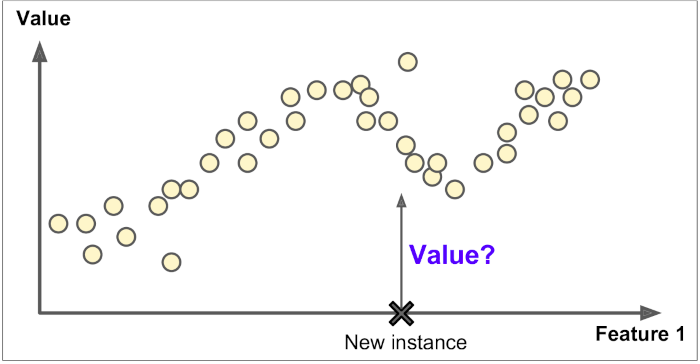 -->
<img src='imgs_basic/homl_regression2.png' width=600 align='center'/>

*Regression example, with a single input feature. Predictions of values for unseen inputs are made based on the previously seen training data (Source: **{homl}**, Figure 1-6)*.


Simply put, classification tells you **what it is** whereas regression tells you **what value it has**.

### Supervised, Unsupervised, Semi-supervised and Reinforcement Learning

There are several ways we can categorise ML models, referred to as the type of learning. 

- **Supervised learning** builds a model using labelled data. Supervised learning is the type of ML that is used the most in practice and most of the algorithms we cover in this course are supervised learning algorithms. 

    - Examples: sorting emails to know which ones are spam (classification), autocorrect, predictive analytics, object detection (such as facial recognition), predicting the price of a car (regression) etc.
<br></br>


- **Unsupervised learning** is performed when the training data is **unlabelled**. Instead the model must be built based on other properties.

    - Examples: **clustering** the data into unknown categories, finding structure in high-dimensional data, social network friend suggestions etc.
<br></br>

An example of a training dataset for supervised vs unsupervised learning can be seen in the first figure below. The second figure illustrates the scenarios in which the different types of algorithms are used.


<img src=imgs_basic/labelled_vs_unlabelled.png height=400 align="center"/>

*Example of labelled and unlabelled data for supervised and unsupervised learning respectively. In the supervised case, each class is already labelled. In the unsupervised case, the algorithm must learn the clusters from the unlabelled data.*


<img src="imgs_basic/types_of_ML.png" alt="Examples of uses of different types of ML" width="500"/>

*Venn diagram of what tasks use supervised and unsupervised techniques [[source](https://en.wikipedia.org/wiki/Supervised_learning)]. Some tasks deliberately cross circle boundaries, highlighting how the traditional boundaries of these models are being blurred with today's algorithms.*

- **Semi-supervised learning** or **weak supervision** is a type of ML somewhere between the first two types, where the algorithm deals with partially labelled data. Often the labelled data points are used to infer labels for the unlabelled data points, and the combined labelled dataset is used to train a complete model for making predictions on new data.

    - Examples include: face identification in a series of photos. A semi-supervised algorithm identifies the same person in multiple photos and can then label that person in every photo once a label is provided for one photo.

<img src=imgs_basic/semi_supervised_example.png align="center"/>

*Example of semi-supervised learning. The unlabelled grey points help classify a new point, marked by the cross, into the triangle class, despite the proximity of the labeled squares. The labels for the unlabelled points are inferred first and then used to help make a prediction on unseen data. (Source: **{homl}**, Figure 1-11).*

- **Reinforcement learning** has **agents** that can take different actions according to a policy. Actions are rewarded or penalised depending on the application, so the agent must learn the best policy of actions to take in a given situation, to maximise the reward and minimise the penalty. Inputs to the model are parameters of the situation, and the output is the choice of action by the agent.

   - Examples include: teaching robots to walk, AI for chess, training of virtual opponents in computer games

<img src=imgs_basic/reinforcement_example.png align="center"/>

*Example of reinforcement learning. Rewards and penalties are associated with each action the agent can take, and the policy is updated depending on the specific reward or penalty received after the action (Source: **{homl}**, Figure 1-12).*

### Instance-Based and Model-Based Learning

The purpose of ML is to be able to take the data that you have and generalise it to new data, and there are two main approaches to achieve this:

- **Instance-Based Learning**: the algorithm uses the whole dataset as 'model' and simply compares a new and unlabelled data instance to the labelled dataset. The prediction for the new instance is based on how 'similar' it is to other instances of the labelled dataset. A common similarity measure is the distance between points. Instance-based learning can also be called memory-based or lazy learning, since processing only occurs when a new prediction must be made.

    - An instance-based learning algorithm that we will cover is **k-nearest neighbours**.
    
<img src=imgs_basic/instance-based-example.png align="center"/>

*Example of instance based learning: the value at a new data point is determined by the existing instances only. (Source: **{homl}**, Figure 1-15).*


- **Model-Based Learning**: the algorithm tries to generalise any underlying patterns in the training data as a model, whose parameters are learned from the data. Predictions for new data are made through the model and the training data is not needed anymore once the model is built.
    
    - Most algorithms in supervised learning fall under this category, like **support vector machines**, **boosted decision trees** and **neural networks**.
    
<img src=imgs_basic/model-based-example.png align='center' height=500/>

*Example of model based learning: the value at a new data point is determined by a model, which has learned its parameters from existing instances.*

<hr style="border:2px solid gray">

# ML regression [^](#index) <a name="regression"></a>

In a regression problem, the model is trying to predict a **value** of some quantity. 

This is different from the fitting that your were performing with iminuit last week. There, you had an implicit assumption that there is an underlying truth that the data would follow in the absence of noise and statistical effects. Here all that is assumed is that these data vary in a similar way, i.e. we don't have any knowledge about what kind of model the data follows.

Let's set up a dataset and split it into training and testing data before we look at our first regression algorithm:

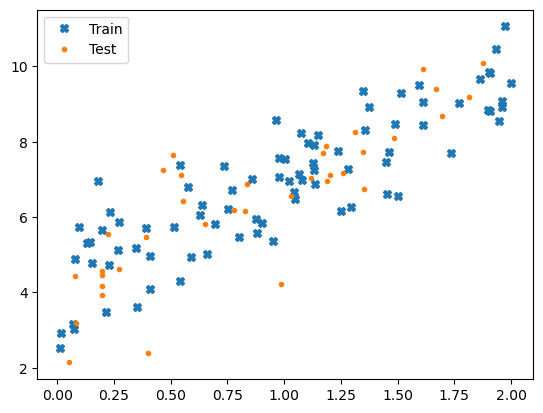

In [1]:
#Importing relevant packages and functions
import numpy as np 
import sklearn
from sklearn.model_selection import train_test_split
import pylab as pl
from IPython.display import Latex

x = 2*np.random.rand(120, 1) 
# np.random.rand: prodcues array of numbers from a uniform distribution

y = 4 + 3*x + np.random.randn(120, 1) 
# np.random.randn: prodcues array of numbers from a normal distribution. 
# Here we are adding normally distributed noise.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 
#sklearn can split your data into samples for you, here we have done a 70:30 split of training:testing.

#Plotting our data
pl.plot(x_train,y_train,"X", label='Train')
pl.plot(x_test,y_test,".", label='Test')
pl.legend()
pl.show()

We have plotted $y=(3x+4)+\epsilon$, where $\epsilon$ is a random number on the interval $[0,1)$. Through this $\epsilon$, we have essentially added noise to what would otherwise be a perfect straight line.

<hr style="border:2px solid gray">

## k-Nearest Neighbours [^](#index) <a name="knn"></a>

k-Nearest Neighbours (k-NN) is one of the most commonly used ML algorithms, and is an example of an instance-based algorithm. The k-NN algorithm can be used for both classification and regression. It starts with calculating a so-called **distance metric** of a new point $\mathbf{X}$ to all other points in the training dataset. The algorithm then finds the $k$ points nearest to $\mathbf{X}$ and:

- In a **classification** problem, we assign the new data point $\mathbf{X}$ to the most frequent class of its $k$-nearest neighbours. The classes or data points can additionally be weighted in some cases. The image below shows an example of the simple, unweighted case. When $k=3$, i.e. in the innermost circle, the black object is classified as a triangle, whereas when $k=7$ i.e. inside the outer circle, the object is classified as a square.

<img src=imgs_basic/k-nn_classification_example.png width = 400 align='center'>

*Example of classification using k-NN: inside the first circle $k=3$, the most common class in the nearest neighbours to the black object is the square class, so the black object is classified as a square. Inside the second circle $k=7$, the most common class is the triangle and so the black object is classified as a triangle.*

    
- In a **regression** problem, where labels are continuous variables, the predicted label of the new data point $\mathbf{X}$ is calculated as the mean of the labels of its k-nearest neighbours, which can again be weighted. An example can be seen in the figure below.
    
<img src=imgs_basic/k-nn_regression_example.png width = 1000 align='center'>

*Example of regression using k-NN: the data is generated according to $y = \mathbf{X}^2$ plus Gaussian noise. For $k$ = 5, the prediction is close to the trend we would expect. However, for $k$ = 12, the prediction point is overestimated compared to $k$ = 5, as higher values are captured in the $k$-nearest neighbours.*

The choice of **distance metric** is one of the most important hyperparameter choices for a k-NN model, as it defines which points are the nearest neighbours of a prediction point.

A commonly used distance metric is the (classic) Euclidean distance
\begin{equation*}
d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
\end{equation*}
where $\mathbf{p}$ and $\mathbf{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen depending on the problem at hand. 

A helpful resource for the different types of distance metrics, and situations where they are used, can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

You can also choose how points are weighted. Common choices are either uniform, i.e. every point is considered equal, or distance, which weighs the contribution of a given training point inversely to the distance from the prediction point. In the latter case, closer training points contribute more. Generally, it is also possible to define your own weighting scheme. For more information on this, see the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Now that we have established the basics of k-Nearest Neighbours, let's try it for the simple regression task that we set up earlier with the data that we generated according to $y=(3x+4)+\epsilon$. 

In the code below, we will call the `fit()` method of our model on the training data. As mentioned before, kNN is an instance-based algorithm, rather than model-based, so no calculations are involved in this step. The algorithm is simply committing the data set to memory. Only when we call the `predict()` method, the distance will be calculated and a prediction made.

The mean squared error is 1.1


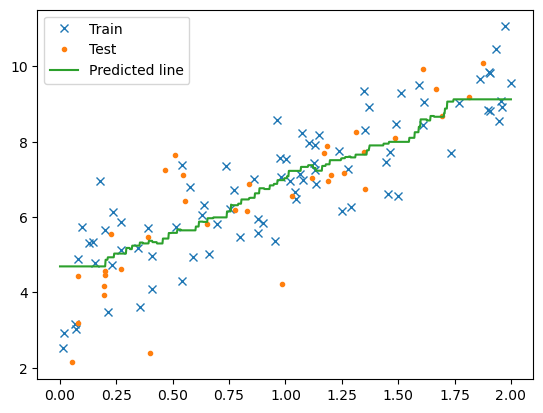

In [2]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

k = 18 # number of NN taken into account.

weights = "uniform" 

# Uniform weights. All points in each neighborhood are weighted equally.

#weights = "distance" 

# Weight points by the inverse of their distance. 
# Closer neighbors of a query point will have a greater influence than neighbors which are further away.
# Try experimenting with weights to see how it effects the model

model = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weights)
model.fit(x_train, y_train)

# Plotting the predicted line from the training data

xl = np.linspace(0, 2, 1000).reshape(-1, 1)

pl.plot(x_train, y_train, "x", label='Train')
pl.plot(x_test, y_test, ".", label='Test')

pl.plot(xl, model.predict(xl), label='Predicted line')
# As discussed previously, it is here where the actual prediction takes place

pl.legend()

#Calculate the root mean squared (RMS) error for testing data

pred = model.predict(x_test) #Make prediction on test set
error = np.sqrt(mean_squared_error(y_test, pred)) #calculate RMSE

print("The mean squared error is", round(error, 2))
pl.show()


As well as using our test data to evaluate the effectiveness of our model, we will use **cross-validation**.

<hr style="border:1px solid gray">

### Interlude: Cross-Validation    

Of course, because we can vary hyperparameters or even the specific algorithm we choose to use for the problem, this isn't all we need to consider. Historically, it was common to iterate on an ML algorithm, varying hyperparameters, until the performance on the **test data** was deemed sufficiently good. Of course, if this is done, you are implicitly learning the test data to some degree, just through your hyperparameter optimisation rather than during the training procedure. 

To get around this, the idea of cross validation (CV) came around. This is where you break down the training set into a number of distinct and non-overlapping smaller sets called **folds**. You then train your model with all but one of these folds and evaluate with the remaining fold. This process is repeated so often that every fold acts as a test dataset once. This way you get an array of evaluations to validate individual attempts at training a model and the overall performance is calculated as the average value found over all run-throughs. Your test data can (and should) be kept to one side for final evaluation after you have finished optimising your model training. 

#### k-fold Cross-Validation

This is when you **split your data** into **training-validation** sets $k$-times to reduce the risk of **overfitting** to the full training data or to parts of the training data.

**Choosing number of folds $k$:** It seems clear that the way in which you split the data into training and validation, and the balance between both sets, will affect the results of the cross-validation. The extreme case is $k=N$, where $N$ is the number of instances in your data set. This is called **leave-one-out** cross-validation (LOO-CV). This tests how well each sample can be predicted from the rest of the samples. However this is computationally expensive and **not necessary**.

In practice, the number of folds $k$ is chosen based on the size of the data and the amount of computing power available, larger $k$ means more models need to be fit. Typically $k=5$ is used for a smaller dataset and $k=10$ for larger ones, so that one does out-of-sample prediction on validation sets that contain around $10\%$ of the data.

More information can be found [here](https://machinelearningmastery.com/k-fold-cross-validation/).

***Note:*** The $k$ in k-fold Cross-Validation has nothing to do with the $k$ in k-NN, it seems $k$ is just a very popular variable name for integer variables.

It is easy to do cross-validation with sklearn, using the ```cross_val_score``` function. Each ML algorithm in sklearn has a default **scorer**, which we will stick to for now. You will see more details about ML performance metrics in a couple of weeks time, but for now we will use cross validation with our toy k-NN model to see how it works:

In [3]:
from sklearn.model_selection import cross_val_score

n = len(xl)

cross_val_arr = cross_val_score(model, x_train, y_train, cv=3) 

print (cross_val_arr)
print (np.average(cross_val_arr))                             

[0.66245231 0.6790447  0.71309304]
0.6848633493649988


<hr style="border:1px solid gray">

<div style="background-color: #C2F5DD">

### Exercise

- Investigate how well kNN performs as a function of number of nearest neighbours and type of weighting. Try changing the number of points maybe from 120 to 1200 and see how things change.
    
- Investigate how the value of $k$ in the k-fold CV changes the estimation of performance.

We will now take a moment to consider what challenges exist in machine learning.

<hr style="border:2px solid gray">

# Challenges in Machine Learning [^](#index) <a name="challenges"></a>

Sometimes, applying ML can seem pretty simple. However, there are many possible pitfalls with these approaches that you need to be aware of. In fact, there have been several high-profile incidences of machine learning algorithms going wrong. These include:

* Amazon's development of an AI tool to help shortlist job applicants, which was trained on the previous 10 years of resumes submitted to Amazon. Because these resumes were predominantly from male candidates, the algorithm "learned" that male candidates were more likely to be successful and therefore penalised resumes that had terms identifying it as a female applicant. Attempts were made to reduce the bias but ultimately were unsuccessful and the [project was scrapped](https://www.bbc.co.uk/news/technology-45809919).
* Microsoft's AI chatbot Tay, which was released on Twitter and learned from interacting with people on the platform. [Within 16 hours the project was taken down](https://en.wikipedia.org/wiki/Tay_(chatbot)) as the AI started posting racist and sexist tweets, due to learning from users spamming it with politically incorrect phrases and disciminatory language. 

Because the model just learns from your data, if you are not careful with what is in your training data you can easily produce results that are a) unexpected, and b) undesirable. This is one of the many reasons why it is important to visualise and understand your training dataset.

A few possible challenges include:

- **Insufficient training data**: to build an accurate, generalisable model, you typically need **a lot** of training data; insufficient data means your model can't accurately learn the parameters and so cannot make accurate predictions.


- **Biased training data**: perhaps more dangerous than insufficient training data, as biased training data can mean your model does very well in some cases, but very poorly in others. Some form of **regularisation** can be used to mitigate this to some extent but more on this later.
    - Examples of biased training data are an imbalanced training dataset, where you show more examples of one class than the others, or systematic issues with measurement e.g. poor thermal contact, zero error, background noise etc.


- **Poor quality training data**: if your data is noisy, or has a lot of outliers, the ML algorithm cannot accurately learn model parameters to reliably make the right predictions. For data with missing values for some features, e.g. if you have issues with the measurement equipment, you need to decide how to manage the data point. There are many different methods with their own pros and cons. Two common ways to reduce the problem to some extent are to either take a median value or to set it to a value far outside of the reasonable range for the feature. In the last case, the model just learns not to use this value.


- **Irrelevant features**: not all features that can be constructed or used are necessarily relevant for the model. In such a case with too many irrelevant features in your data, the most relevant information could be ignored by the model. An important part of ML is **feature engineering**, where you create a dataset with an appropriate set of features. This can involve selecting only the most important data features, a process called *feature selection*, or combining features into new and more appropriate features, which is called *feature extraction*. For example, if a feature is only a function of the radius $r$, where $r=\sqrt{x^2+y^2}$, it is better to use $r$ as a feature in your model rather than $x$ and $y$ separately.


- **Overfitting**: overfitting describes the situation where a model learns how to predict the training data and **only** the training data. The model is sufficiently complex that it can perfectly fit the training data, e.g. fitting a high order polynomial to data that is perhaps better modelled as a linear relationship with some noise. This results in a poor prediction for unseen data. To prevent this, you should try to keep your model as simple as possible, as well as perform cross-validation checks. Additionally, **regularisation** can help to reduce the risk of overfitting at training time.


- **Underfitting**: the opposite of overfitting, this occurs when your model is not sufficiently complex to capture the underlying structure of the data. As a result, it is not capable of learning the correct model parameters behind the data. An example would be trying to fit a quadratic dataset with a linear model.
    
    
Below is an example that clearly illustrates overfitting and underfitting.
    
<img src=imgs_basic/under_vs_over_fitting.png height = 600 align='center'>

*Example of under- and overfitting on quadratic data. The generated data is quadratic with Gaussian noise. The linear model clearly underfits and does not accurately approximate the data, whereas the high-order polynomial (order 300) overfits, resulting in predictions that will not generalise despite good performance on the existing data.*

### Model Validation to Avoid Overfitting

The only way to know if your model has generalised well is to **validate it on data**. As mentioned before, the normal way to do this is to separate your data into **training data** and **testing data**. You use the **training data** to train your model and the **testing data** to test how well it has generalised. If there is a large difference in the performance of the model on the training data compared to the performance on the testing data it shows that your model has been **overtrained** and is learning features that are specific to your training data. 

**Note:** *What fraction of your data should you use to train and what fraction to test?* There is no single answer to this question, but in most cases the training:testing ratio is around 80:20 or 70:30.

We will now look at a couple other simple regression methods.

<hr style="border:2px solid gray">

# More regression techniques <a name="reg2"></a>

## B. Linear Regression [^](#index) <a name="linear"></a>

**Linear regression** is a learning algorithm that uses a weighted linear combination of the input data features as the learning model. It is possible to find an *analytical* solution for the model parameters, i.e. the weights and the offset, that mimizes the chosen performance metric, also called score, in most cases. A proof of this can be found in **{HoML}** for the mean squared error (MSE) metric.

However, as the number of data features becomes very large, e.g. 100,000, this approach becomes computationally very intensive. Another problem for finding the analytical solution is if the data set is too large to fit all the instances into memory. In those cases, different gradient descent methods are needed.

Let's try out a simple linear regression model:

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # Linear regression fit on the training data

m = lin_reg.coef_[0,0] # The gradient of the straight-line
c = lin_reg.intercept_[0] # The straight line y-intercept

print("The line of best fit is y = {m} x + {c}".format(c=round(c, 2), m=round(m, 2)))

The line of best fit is y = 2.72 x + 4.19


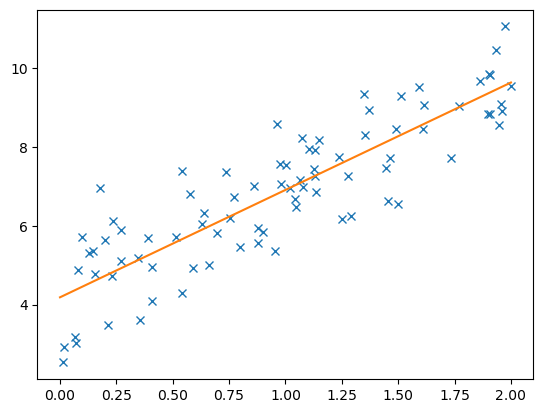

The root mean squared error (RMSE) is 1.04


In [5]:
pl.plot(x_train, y_train, "x")
pl.plot(xl, lin_reg.predict(xl))

pred = lin_reg.predict(x_test) # Make prediction on test set
error = np.sqrt(mean_squared_error(y_test, pred)) #Calculate RMSE of the linear regression

pl.show()
print("The root mean squared error (RMSE) is {error}".format(error=round(error,2)))


<hr style="border:2px solid gray">

## C. Polynomial Regression  [^](#index) <a name="polynomial"></a>

The main concept in polynomial regression is to use a linear model to fit non-linear data. A simple way to do this is to create new features, which are powers of the actual features. We then train a linear model on this extended set of features. Polynomial regression, unlike a plain linear regression model, is capable of finding relationships between features due to the inclusion of features that are products of different features. For example, in the quadratic case between two features $a$ and $b$, a new feature $a \cdot b$ would be added in addition to $a^2$ and $b^2$.

_Note: This example is adapted from **{HoML}** pg. 130-135._

Let's first generate a quadratic dataset with Gaussian-distributed noise, before introducing how we can include the new features with `sklearn.preprocessing`:

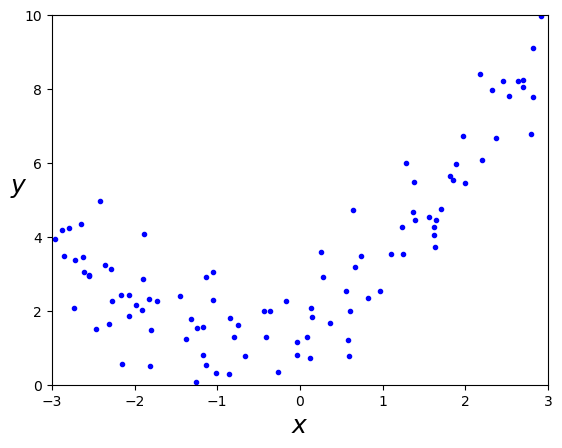

In [6]:
#generate some non-linear data based on a simple quadratic equation
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # Adding some Gaussian noise with mu = 0, sigma = 1

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

<hr style="border:1px solid gray">

### Interlude: Brief Introduction to sklearn Preprocessing

`sklearn.preprocessing` is a powerful package that can add additional features to your dataset or transform your dataset in a certain way before fitting your model. The latter can be very important as many models benefit from standardized datasets, and some even need these to behave well.

In the following, we give a brief introduction to some of the most important modules of `sklearn.preprocessing` that we will need this week. But don't worry too much about the last two yet, we don't need them for now and will go into more detail later: 

* `PolynomialFeatures` takes an input feature matrix, and creates new features with all the possible polynomial feature combinations up to a specified degree, `max_degree`. If required, we could also set a minimum degree, `min_degree`. In the cells below, we will demonstrate some of these features. Additional parameters are (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for the full documentation):

    - The default for `include_bias` is <span style="color:blue">True</span>. If set to <span style="color:blue">False</span>, the feature column for the $0^{th}$ degree polynomial won't be created.

    - The default for `interaction_only` is <span style="color:blue">False</span>. If set to <span style="color:blue">True</span>, only polynomial features that are *combinations* of the input features are created. 



* `StandardScaler` standardises the features in the dataset, i.e. the feature mean will be removed from each feature instance and the instance then scaled, so that the feature will be centred around zero have a variance of one. This is important as many ML models require centred data that are of the same order of magnitude. ions and estimators are added to the Pipeline format as a tuple, i.e. `Pipeline([('transform name', transform)])`. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for the full documentation.

* `sklearn.pipeline` sequentially combines a list of transformations, such as `StandardScaler`, with a final estimator to assemble a single model. The purpose of this is to be able to cross-validate all steps together while setting different parameters. The transformations and estimators are added to the Pipeline format as a tuple, i.e. `Pipeline([('transform name', transform)])`. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for the full documentation.

There are far more prepocessing examples we could use to create features, a list of which is found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), including binning continuous data into intervals, binarizing data or adding a dummy feature. If you want to learn more about preprocessing data with sklearn, a good summary is found [here](https://scikit-learn.org/stable/modules/preprocessing.html).

#### Parameter Demonstration for `sklearn.preprocessing.PolynomialFeatures`

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

data = np.arange(6).reshape(3, 2)

Headers0=['a', 'b']
df0=pd.DataFrame(data=data, columns=Headers0)

poly1 = PolynomialFeatures(2)
Headers1 = ['1', 'a', 'b', 'a^2', 'a * b', 'b^2']
df1 = pd.DataFrame(data=poly1.fit_transform(data), columns=Headers1)

poly2 = PolynomialFeatures(2, include_bias = False)
df2 = pd.DataFrame(data=poly2.fit_transform(data), columns=Headers1[1:])

poly3 = PolynomialFeatures(2, interaction_only = True)
Headers3 = ['1', 'a', 'b', 'a * b']
df3 = pd.DataFrame(data=poly3.fit_transform(data), columns=Headers3)

display(df0)
display(df1)
display(df2)
display(df3)

,a,b
0,0,1
1,2,3
2,4,5


,1,a,b,a^2,a * b,b^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0


,a,b,a^2,a * b,b^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0


,1,a,b,a * b
0,1.0,0.0,1.0,0.0
1,1.0,2.0,3.0,6.0
2,1.0,4.0,5.0,20.0


<hr style="border:1px solid gray">

Now that we know how to add polynomial features to our data set, let's go back to our polynomial regression problem. In this case, we will add a feature for the squares of the numbers. We can then perform linear regression on this expanded dataset:

In [8]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X) #One feature and square of feature

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

a = lin_reg.coef_[0,1]
b = lin_reg.coef_[0,0]
c = lin_reg.intercept_[0]

Latex("The predicted output function is $f(x)={a}x^2+{b}x+{c}$ whereas\
        the underlying output function is $y=0.5x^2+1.0x+2+\epsilon$ where $\epsilon$\
        is Guassian noise.".format(a=round(a,2),b=round(b,2),c=round(c,2)))

<IPython.core.display.Latex object>

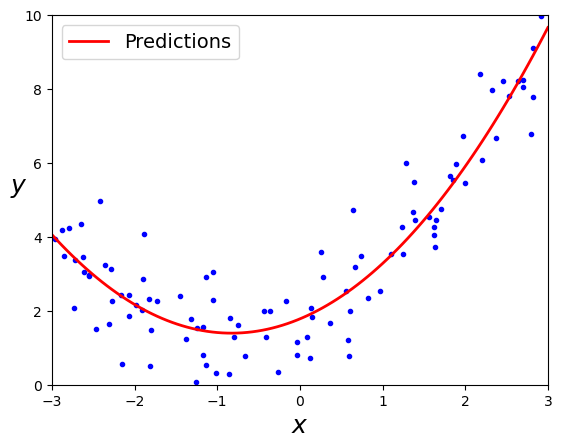

In [10]:
X_linspace = np.linspace(-3, 3, 100).reshape(100, 1)
X_linspace_poly = poly_features.transform(X_linspace)
y_linspace = lin_reg.predict(X_linspace_poly)

plt.plot(X, y, "b.")
plt.plot(X_linspace, y_linspace, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

Now we can experiment with adding more polynomial features to fit this data (20 features):

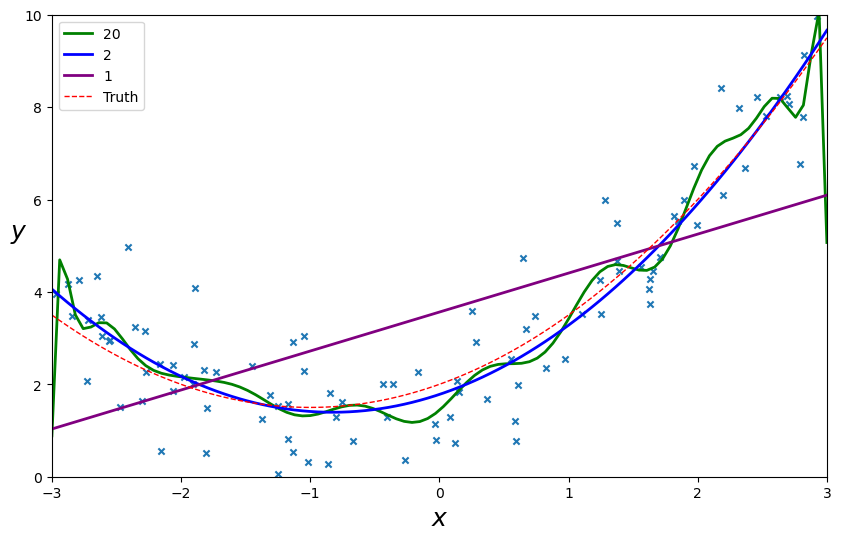

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(10,6))
model_arr= []

for style, width, degree in (("g-", 2, 20), ("b", 2, 2), ("purple", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    # Below we create a complete model. We first create polynomial features, then scale the data
    # before applying the linear regression fit.
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_linspace)
    plt.plot(X_linspace, y_newbig, style, label=str(degree), linewidth=width)

    model_arr.append(polynomial_regression)


y_true = 0.5 * (X_linspace)**2 + X_linspace +2


plt.plot(X_linspace, y_true, '--', color = 'red', linewidth = 1, label = 'Truth')

plt.scatter(X, y, s= 20, marker ='x')
plt.legend(loc = "upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

As you can see, the linear model (polynomial of degree 1) is clearly underfitting the data, while the polynomial model of degree 20 is clearly overfitting. In the next section we will discuss how to investigate and avoid such cases.

<hr style="border:2px solid gray">

# Investigating Over- and Underfitting [^](#index) <a name="over_under"></a>

Earlier, we already discussed one method to estimate a model's generalization performance, i.e. whether it will also perform well on data other than your training data: **cross-validation**. If the model performs well on the training data but receives poor cross-validation metrics, it is overfitting. On the other hand, it is underfitting if it does not well in either case. This can be seen in the example above, as the straight line is far away from all data points except for very few.

Now, we will learn another way to determine whether a model is over- or underfitting: **learning curves**.

## Learning Curves 

Learning curves plot the model's performance on both the training set and the validation set as a function of the size of the training data set. 

To generate these plots, we train the model several times on different sized subsets of the training set. The following cell shows an example way to do this:

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, ax, title):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)   
    train_errors, val_errors = [], []
    
    for m in range(1, len(X)):
        
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    ax.set(ylim=(0,3))
    
    ax.plot(np.sqrt(train_errors), "r-", linewidth=2, label = "train")
    ax.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "val")
    
    ax.grid()
    ax.legend(loc="upper right", fontsize=14)   # not shown
    ax.set_xlabel("Training set size", fontsize=14) # not shown
    ax.set_ylabel("RMSE", fontsize=14)              # not shown
    ax.set_title(title, fontsize = 18)

Now, let's plot the learning curves for our three different models:

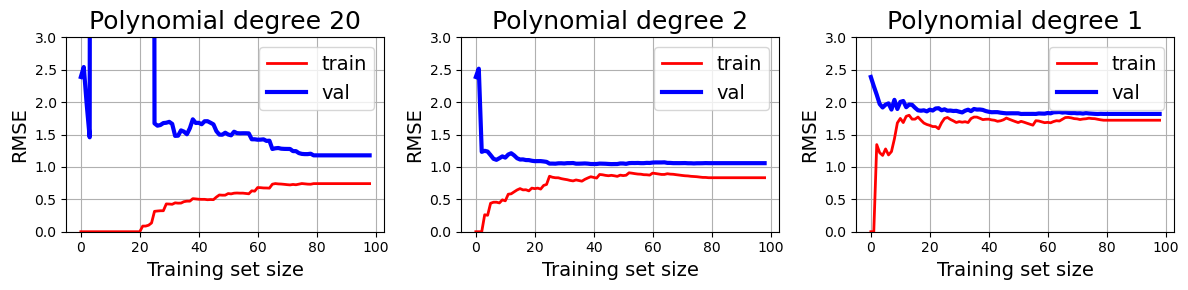

In [13]:
fig, ax = plt.subplots(1,3, figsize=(12, 3))

titles = [f'Polynomial degree {degree}' for degree in [20, 2, 1]]

for count, model in enumerate(model_arr):   
    plot_learning_curves(model, X, y, ax[count], titles[count])

fig.tight_layout()
plt.show()

Let's have a detailed look at the three different learning curves:

1. The first learning curve is for the model using a polynomial of order 20, which is overfitting:

    - Before the training set size surpasses the order of the polynomial, so $n \leq 20$, the model can fit all data points in the training set perfectly which results in a root mean squared error (RMSE) of the training set of 0. However, the model performs poorly on the validation set and hence the RMSE is quite high for this set in the $n \leq 20$ region.

    - As the training set size increases, the RMSE of the training sample also increases while the one of the validation sample decreases, until a plateu is reached for both. This is because the model cannot fit the training data perfectly anymore, however, it starts to actually learn some underlying features from the data which is why its performance on the validation data gets better. Characteristic for overfitting is the large gap between the RMSE of the plateau region training sample vs validation sample, which means that the model performs significantly better on the training data compared to the validation data. However, if your training data set was much larger, the two curves would continue to approach each other.
<br></br>

2. The second learning curve is for the model using a polynomial of order 2, which matches the complexity of our underlying relationship:
    
    - The learning curves show similar features as for the case of the degree 20 model, however, the RMSE of both the training and validation data both settle close to each other and around 1 when the plateau is reached.
<br></br>

3. The third learning curve is for the model using a polynomial of order 1, which is underfitting the data:
    
    - The curves show again the characteristic feautres already described above but the RMSE of both the training and validation data settle close to 2, which is significantly higher than the RMSE for the other two cases. This indicates that the model has not fully captured the complexity of the dataset and hence both errors are high.
    
    - In such a case where the model is underfitting the data, adding more data will not reduce the error.

<hr style="border:1px solid gray">

## Interlude: Bias-Variance Tradeoff

Bias and variance are key concepts to understand in ML, and the trade-offs between them that you might have to consider. Choosing which of the two to prioritise will depend on the aims of your model.

### What are bias and variance?

While you may have seen these terms in your statistics course, we will explain them here too. In the context of a machine learning model:

* **bias**: measures the average error a model makes in prediction

* **variance**: measures how much the model prediction changes with different training datasets

In fact, in both cases we are averaging over **different training datasets**, rather than the training dataset we use. This lets us understand how well the model can possibly generalise. 

Consider the data distributed according to an order 2 polynomial we saw earlier, and two of the model examples we tried:

* For our linear model, we ended up underfitting. We could choose any selection of the training data we like, and a linear model still could not make accurate predictions for all the test points. This is because the model cannot capture the complexity in the data and thus has a **high bias**. 

* For our order 20 polynomial, we were overfitting and could predict many of the training data points well, but could not generalise to unseen data. If we were to select a different training dataset, we would likely see a very different prediction and would not perform as well on the initial training data. In order words, if we change the training dataset, we get a large change in the prediction - this model has **high variance**. 

### A note on model complexity

As a rule of thumb, more complex models will have lower bias but higher variance, whereas simpler models generally have lower variance but higher bias. However, this is not always true; for example, consider the function $f(x) = a \sin(bx)$. While this function only has two parameters, $a$ and $b$, we can interpolate an arbitrary number of points by simply increasing $b$ and thus tuning the frequency of the model. This way, we can still have models with both high bias and high variance.

### Bias-variance tradeoff

In this example, our feature relationship was quite simple and the exact relationship was known. This is unlikely to be the case for real data, and thus you may have to balance simplistic, low variance models and complex, high bias models. In most cases, we simply aim to minimise the overall error and find the 'sweet spot' between bias and variance. Any noise in our dataset will introduce an **irreducible error**, meaning that this minimum error can never be 0.

The figure below shows this trade-off, as well as the sweet spot.

<img src="imgs_basic/Bias_and_variance_contributing_to_total_error.png" width="600"/>

*Schematic illustrating the behaviour of model error as a function of model complexity [[source](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)]. For simpler models, the main error contribution is bias, whereas as models become more complex variance begins to dominate the total error. The optimum model complexity balances bias and variance to minimise the total model error.*

In practise, a lot of handling this is not finding a perfect model but instead implementing extra constraints in training to reduce model complexity. This is called **regularisation**, and is discussed later.





<div style="background-color:#FFCCCB">

## Bias-Variance Decomposition

### Data definition

Consider some data $\{\mathbf{X}, y\}$ with Gaussian noise $\varepsilon$, with a mean of 0 and a standard deviation of $\sigma^2$. If the label values without noise are given by some function $f(\mathbf{X})$, we can in general write 

$$y = f(\mathbf{X}) + \varepsilon,$$

and for a single data sample $\{\mathbf{X}_i, y_i\}$ we can write that

$$y_i = f(\mathbf{X}_i) + \varepsilon_i,$$
where $\varepsilon_i$ denotes some value sampled from the noise distribution.

### Model definition

Using some training set $D = \{(\mathbf{X}_0, y_0), \cdots, (\mathbf{X}_n, y_n)\}$, we want to find the best possible model $\hat{f}(\mathbf{X}; D)$ to approximate our true data function $f(\mathbf{X})$. 

Note: this model is a function of $\mathbf{X}$, **given** D, our training dataset. This is because the model prediction depends entirely on what it learns from the training dataset.

To measure how close we are, we use the mean squared error between the true label values and the model predictions, i.e. we want to minimise

$$(y - \hat{f}(\mathbf{X}; D))^2$$
not only for our training datapoints in $D$ but also for other points outside of our sample, i.e. any test points or unseen data. Of course, we can only do so well, as we have noise in our data; we have an irreducible error. 

### Error decomposition

For some specific test sample $\mathbf{X}$, we can write the expectation of our mean squared error as a sum of three components, where we take the expectation over the selection of training dataset $D$. This is written as follows:

$$\mathbb{E}_{D}\left[(y - \hat{f}(\mathbf{X}; D))^2\right] = \left(\text{Bias}_D\left[\hat{f}(\mathbf{X}; D)\right]\right)^2 + \text{Var}_D\left[\hat{f}(\mathbf{X}; D)\right] + \sigma^2,$$
where
$$\text{Bias}_D\left[\hat{f}(\mathbf{X}; D)\right] = \mathbb{E}_D\left[\hat{f}(\mathbf{X}; D) - f(\mathbf{X})\right]$$
and 
$$\text{Var}_D\left[\hat{f}(\mathbf{X}; D)\right] = \mathbb{E}_D\left[\left(\mathbb{E}_D\left[\hat{f}(\mathbf{X}; D)\right] - \hat{f}(\mathbf{X}; D)\right)^2\right],$$

and $\sigma^2$ is the variance of our Gaussian noise as defined before. Even if both bias and variance were 0, we would still have a non-zero expected mean squared error of $\sigma^2$. You can find full derivations of this decomposition online, e.g. [on Wikipedia](https://en.wikipedia.org/wiki/Bias–variance_tradeoff#Bias–variance_decomposition_of_mean_squared_error).





<div style="background-color: #C2F5DD">

### Exercise

Using the polynomial data we generated earlier, and the fact that we know the true model function is given as $f(x)=0.5x^2+1.0x+2$ and the Gaussian noise has $\sigma$ = 1, perform the bias-variance decomposition for the three polynomial models we considered. 

To find the expectation over training datasets, you should train each polynomial model (order 1, 2, and 20) at least 20 times (more is better) on different random samples of the **training data** i.e. keep the same test data, then randomly subsample from the training data **with replacement**. You may have already seen this in your statistics course as bootstrapping.

Then, find the bias and variance using your selection of models with different training datasets. You should also verify your bias, variance, and irreducible error sum to give the expectation of the mean squared error (you will need to calculate this separately).

Note: in general this would not be possible, as we wouldn't necessarily know $f(\mathbf{X})$ or $\varepsilon$

(If you get particularly stuck, sklearn has a [similar example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html) that would require some adapting)


In [ ]:
# Your code here

<hr style="border:1px solid gray">

## Regularisation

In **regularised regression**, we try to limit the complexity of the model in order to avoid overfitting. For example, a simple way to regularise a polynomial model is to reduce the number of polynomial degrees. In practice, we often add a **penalty term** to our **cost function**, which is the function the algorithm tries to minimze during training. In particular, we choose a penalty term for which the value increases the more complex the model gets. Therefore, simpler models will be generally preferred. 

Knowledge of the underlying priciple of regularisation is not required for this course, however, it may be useful to know that this technique is available to you. Implementation with sklearn is quite simple, and details can be found [here](https://scikit-learn.org/stable/modules/linear_model.html). The three most common types of regularisation are:

* Ridge Regularisation,

* LASSO Regularisation,

* Elastic Net (somewhere between the two).

***Note:*** If you decide to use regularisation during training, you need to make sure that you use a performance metric or cost function without the penalty term for evaluation of the model performance after training, e.g. if you use an RMSE cost fuction with a Ridge regularisation term, to evaluate model performance you should only use the RMSE, not the regularisation term as well. 

<div style="background-color:#FFCCCB">
 
### Principle of Regularisation
    
The fewer degrees of freedom a model has, the harder it will be for the model to overfit the data. Therefore, we try to limit the degrees of freedom, or in other words the model complexity, through regularisation. Note that the explanations here will discuss how regularisation works for regression models, however the technique can also be applied for classification.
    
***Note:*** Most regularisation types are sensitive to the scale of your data, so you should always scale the data beforehand, e.g. with `StandardScaler`.

### Types of Regularisation

**Ridge (L2) Regression** 
    
Ridge regression is a regularised version of linear regression. It aims to prevent overfitting by adding the following penalty term to the cost function, which is also called the loss function:
    
\begin{equation}   
  \lambda|\boldsymbol{\theta}|^2=\lambda\sum_{i=1}^{n}\theta_{i}^{2},
\end{equation}
    
where $\theta_{i}$ is the $i^{th}$ weight of the linear regression model (i.e. $y = \theta_{1}x_1 + ... \theta_{n}x_n$ + c, so $\theta$) and $\lambda > 0 $ is our regularisation coefficient and therefore a hyperparameter. The greater $\lambda$, the greater the regularisation but also the greater the chance of  underfitting the data. In order to find the best $\lambda$ according to our perfomance measure, we can use e.g. cross-validation. Note that $\theta_0$, i.e. the intercept, or bias term, is not regularised.
    
With this and using the mean squared error (MSE) as our unregularised cost function, our new cost function becomes:
    
\begin{equation}   
  Loss = MSE + \lambda|\boldsymbol{\theta}|^2.
\end{equation} 
    
The benefit of this is that the model, which trains to minimise the loss function, will aim to keep the model coefficients, i.e. the weights, small while balancing the MSE. And a smaller model coefficient means that the model will be less sensitive to that model feature.
    
This form of regularisation is also called L2 regularisation and should create a small increase in bias in return for a significant decrease in variance. 
   
See [StatQuest](https://www.youtube.com/watch?v=Q81RR3yKn30) for more information, an explanation on how to adapt the method for classification and how ridge regression can create a model even when there are only a  limited number of instances.
    
**LASSO (L1) Regression**    

LASSO Regression stands for **L**east **A**bsolute **S**hrinkage and **S**election **O**perator Regression and works in a similar way to Ridge Regression, but with a different penalty term:

\begin{equation}   
  Loss = MSE + \lambda\sum_{i=1}^{n}|\theta_{i}|
\end{equation}    
    
Again, we would find the optimised $\lambda>0$ using cross-validation.
    
The **major difference** between Ridge and Lasso Regression is that in Lasso Regression the coefficients can reach **exactly** 0, whereas in Ridge Regression these coefficients can only get **very close to** 0. Being able to achieve a coefficient of exactly 0 can be useful, as it allows us to identify, and effectively remove, features with no or very small effect on the output. In practice, this is exactly what Lasso Regularisation does, it will set most feature weights to 0, creating a so-called **sparse model**, by automatically performing **feature selection** and removing unimportant features.
    
Therfore, Lasso Regression can be helpful for model explainability, however, if you are only interested in maximum model performance, Ridge Regression usually performs better.
    
If you would like to see these differences visualised, please watch [StatQuest - Ridge vs Lasso Regression](https://www.youtube.com/watch?v=Xm2C_gTAl8c).

**Elastic-Net Regularisation** 
    
Elastic Net Regularisation (ENR) is useful when not that much information is known about feature importance, i.e. if we have a large number of features, and thus the choice between Lasso and Ridge Regression is unclear. Instead we can choose to use ENR, which aims to offer a 'best of both worlds' approach. ENR uses the penalty terms of both previously introduced regularisations, with each penalty term being paramatised by a different $\lambda$:
    
\begin{equation}
    Loss = MSE + \lambda_1\sum_{i=1}^{n}|\theta_{i}| + \lambda_2\sum_{i=1}^{n}\theta_{i}^{2}.
\end{equation}

Alternatively, the following parameterisation is sometimes used, with $r$ giving the mix ratio of Lasso and Ridge Regression:
    
\begin{equation}
    Loss = MSE + r\lambda\sum_{i=1}^{n}|\theta_{i}| + \frac{1-r}{2} \lambda\sum_{i=1}^{n}\theta_{i}^{2}.
\end{equation}
    
Again, we can use cross-validation to identify the optimal choice of hyperparameters.

All three of these regularisation techniques are available in sklearn, programmed as modifications to `LinearRegression`:

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

The syntax works the same as any other sklearn model, so we can pass any hyperparameter values to the model (e.g. our values for $\lambda$ in Ridge or Lasso, called `alpha` in sklearn, or values for r and $\lambda$ for ElasticNet, called `l1_ratio` and `alpha` respectively). See the documentation for [Ridge](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification), [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso), and [ElasticNet](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) respectively for their syntax.

In [ ]:
ridge_model = Ridge(alpha = 0.5)
lasso_model = Lasso(alpha = 0.5)
elasticnet_model = ElasticNet(r = 0.8, l1_ratio = 0.4)

There are many other regularisation models available in sklearn. For the selection available for linear regression, see [the documentation](https://scikit-learn.org/stable/modules/linear_model.html#linear-models).

<div style="background-color: #C2F5DD">

### Exercise

Using some of the regularisation techniques shown here (or any others of your choice), go back to the polynomial data we used before and try to improve the performance with the order 20 polynomial features. 

Split the data into train & test datasets and evaluate your models based on the test data mean squared error. Compare the different regularisation techniques and find the best performance you can.

In [ ]:
# Your code here

<hr style="border:1px solid gray">

<div style="background-color: #C2F5DD">

## Exercise

Investigate the following student data, which you have seen previously in the Data section of this course. Experiment with using different forms of regression, including linear, different polynomial powers, etc. First see how G3 varies with G1 and G2, and then try including a new feature that combines G1 and G2.

Additionally, try using regularisation techniques to see if performance improves.

In [ ]:
import pandas as pd
students=pd.read_excel(r'student-por.xlsx') 
display(students)

<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

# Appendix <a id='appendix'></a> [^](#index)

In this section, you will find longer pieces of mathematics and code which are **non-examinable**, as well as some mathematical formulas you may have forgtten. Please read at your own discretion

- A. [Mathematical Equation Recap](#maths_recap)
- B. [Gradient Descent](#gradient)
- C. [Types of Gradient Descent](#types_grad)


<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## A. Mathematical Equation Recap [^^](#appendix) <a id='maths_recap'></a>

### Mean Square Error (MSE)
    
\begin{equation}
\text{MSE}=\frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-y_i)^{2},
\end{equation}
    
where $\hat{y}_i$ is the label value predicted by the trained model for the $i^{th}$ instance, $y_i$ is the actual label of said test instance, and $N$ is the total number of test instances.
    
    
### Root Mean Square Error (RMSE)

This is defined mathematically as the square root of MSE
\begin{equation}
\text{RMSE}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-y_i)^{2}},
\end{equation}
    
where $\hat{y}_i$ is the label value predicted by the trained model for the $i^{th}$ instance, $y_i$ is the actual label of said test instance, and $N$ is the total number of test instances. 
    
***Note:* Minimising RMSE will have the same effect as minimising MSE and vice versa.** However, calculating the root is computationally intensive, so the MSE is often preferred as cost function and performance metric.
    
### Euclidian Distance
    
The Euclidian distance $r$ between two points, $\boldsymbol{x}$ and $\boldsymbol{y}$, in $k$ dimensional space is given by:

\begin{equation}
r =\sqrt{\sum_{i=1}^{k}(x_i-y_i)^{2}},
\end{equation}
    
where $x_i$ and $y_i$ are the $i^{th}$ components of the vectors $\boldsymbol{x}$ and $\boldsymbol{y}$, respectively.

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## B. Gradient Descent [^^](#appendix) <a name="gradient"></a>
    
_You have previously covered gradient descent in the Statistics part of this course. This section serves as a refresher, and may offer new insight._
    
_References: Medium: Robert Kwiatkowski - [Gradient Descent Algorithm](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21), Medium: Adarsh Menon - [Linear Regression Using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)_
    
In gradient descent, we aim to change the values of our parameters, stored in some vector $\boldsymbol{\theta}$, to find the minimum of the loss function.  
    
First, we will imagine an example where we only have one parameter, $\theta$, to optimise. We start by picking a random value for $\theta$, and calculate the loss function. We could then change $\theta$ by a small amount + $\delta$, which we will describe as 'moving'. If the loss function has increased, this suggests we have moved in the 'wrong direction' and that our new parameter value $\theta + \delta$ produces a worse model than before. Instead, we should attempt to move in the $-\delta$ direction.
    
We want to constantly be moving in the direction where the loss function decreases. With the loss function as our y-axis, this would be in the **negative** gradient direction, i.e. 'down the hill'. We should repeat this process until we reach the minimum, i.e. the gradient is 0.
    
This generalises easily to more dimensions. To find the minimum of the loss function as quickly as possible, we assume we always want to be moving in the direction with the **greatest** negative gradient: $-\nabla L(\boldsymbol{\theta}$).
    
*Note:* In more sophisticated ML algorithms, this description of gradient descent is no longer accurate and just represents a simplification of the process. In reality, the optimal direction to change $\boldsymbol{\theta}$ is given by a much more involved equation than simply calculating the gradient (see [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent) for Wolfe's equation).
    
    
    
    

In [ ]:
import numpy as np
m = 200
x_lin =np.linspace(-3,3, 100)
y_real= 5 * x_lin 

x = 6 * (np.random.rand(m, 1) - 0.5)
noise = 2.5 * (np.random.randn(m, 1)) # Adding some noise
y =  5 * x + noise 


plt.plot(x_lin, y_real, 'r', label = 'True Relationship')
plt.plot(x, y, "bx", label = 'Simulated Data')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend()

plt.show()

In [ ]:
length = len(x)

def calc_loss(y_data, pred, length):
    
    terms = (y_data - pred)**2
    loss= np.sum(terms)/length
    return (loss)
    
def calc_grad(x_data, y_data, pred, length):
    
    terms = x_data*(y_data - pred)
    grad = -(2/length) * np.sum(terms)
    return(grad)

loss_arr=[]
theta_arr = np.linspace(0, 10, 100)

for theta in theta_arr:
    
    y_pred = theta * x
    loss = calc_loss(y, y_pred, length)
    loss_arr.append(loss)
    
plt.plot(theta_arr, loss_arr) 
plt.show()

In [ ]:
def gradient_descent(theta_init, x_data, y_data, alpha, tol, max_iter):
    
    length = len (x_data)
    theta = theta_init
    iter_count = 0
    
    theta_arr = [theta]
    loss_arr = []
    pred = theta * x_data
    
    while iter_count < max_iter: 
        
        
        grad = calc_grad(x_data, y_data, pred, length)
        diff = - grad * alpha
            
        if np.abs(diff)<tol:
              break

        if iter_count == 0:
            loss_arr.append(calc_loss(y_data, pred, length))

        plt.arrow(theta, loss_arr[-1], diff, 0, head_width=abs(diff/3), linewidth=1, 
            length_includes_head=True, head_length=abs(diff/15), fc='r', ec='r')
        
        theta = theta + diff
        theta_arr.append(theta)

        pred = theta * x_data
        loss = calc_loss(y_data, pred, length)
        
        size = loss - loss_arr[-1]
        param = abs(size/10)
    
        plt.arrow(theta, loss_arr[-1], 0, size, head_width=param/6, linewidth=1, 
          length_includes_head=True, head_length=param/1.5, fc='r', ec='r')       

        loss_arr.append(loss)
        
        iter_count += 1 
         
             
    return (theta_arr, loss_arr)

def plot_loss(max_x):
    loss_arr=[]
    theta_arr = np.linspace(-max_x+5, max_x+5, 100)

    for theta in theta_arr:
        
        y_pred = theta * x
        loss = calc_loss(y, y_pred, length)
        loss_arr.append(loss)
    
    plt.plot(theta_arr, loss_arr) 

    

In [ ]:
theta_init = 5 + 10 * (np.random.rand() - 0.5)

theta_GD, loss_GD = gradient_descent(theta_init, x, y, alpha=0.1, tol= 0.01, max_iter=20)


max_x = np.max(abs(np.array(theta_GD)-5))
plot_loss(max_x)

plt.show()

print ('Number of steps:', len(theta_GD) -1)

<div style="background-color:#efdff2">

Choosing a good learning rate is important to improve training performance. If the rate is too small, training will take a long time. If it is too large, the algorithm may miss the minimum entirely, bouncing between the two sides of the loss function.

In [ ]:
# Too small
theta_init = 2
theta_GD, loss_GD = gradient_descent(theta_init, x, y, alpha=0.01, tol= 0.01, max_iter=20)
max_x = np.max(abs(np.array(theta_GD)-5))
plot_loss(max_x)

plt.show()

print ('Number of steps:', len(theta_GD) -1)

In [ ]:
# Too large

theta_init = 2
theta_GD, loss_GD = gradient_descent(theta_init, x, y, alpha=0.35, tol= 0.01, max_iter=5)
max_x = np.max(abs(np.array(theta_GD)-5))
plot_loss(max_x)

plt.show()

print ('Number of steps:', len(theta_GD) -1)

<div style="background-color:#efdff2">

The MSE loss function for modelling a linear relationship is convex, i.e. it doesn't have a **local** minimum, which is why an appropriate learning rate will always find the ideal m (or c). However, we can imagine a situation where the loss function also has a local minimum. The gradient descent algorithm could easily become stuck in that minimum, and thus the function would not be optimised. To solve this, we could either choose our input values very carefully, or perform many runs with many inputs to see what value produced the lowest loss function. We could also use some additional parameters in the decision how to update our parameteres, which can reduce the risk of falling into a local minimum.

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## C. Types of Gradient Descent [^^](#appendix) <a name="types_grad"></a>

In the example above, we have used our whole training dataset to calculate the loss function, and thus the gradient. In reality, this  same result may have been achieved by calculating the loss on a more limited subset. The number of datapoints we use to calculate the loss gives us three main types of gradient descent:

- **Batch Gradient Descent:** The gradient of the loss is calculated over the full training set at each step. This method will produces stable convergence, however may take a long time to train if the training dataset is very large. <br><br> 
  
- **Stochastic Gradient Descent (SGD):** For each update, a random instance is identified from the training data and the gradient calculated based on only this **one** data instance. A new point is then chosen, and the process repeats until all the points in the dataset have been chosen. Note that points cannot be repicked in one epoch. If necessary, we can repeat the process over multiple epochs. Because of this process, the calculated gradient values will contain a lot of noise, moving up and down the loss function and decreasing only on average. Training over enough iterations will bring it close to the minimum but it will still move around. Therefore, the parameters returned in the end will be good but possibly not optimal. However, due to the randomness, the algorithm can jump out of local minima, making it more likely to find the global minimum than e.g. Batch Gradient Descent. <br><br>   
 
- **Mini-Batch Gradient Descent:** This aims to capture the benefits of both the previous methods. A mini-batch tends to contain between 10-1000 random instances from the training data, and the gradient is found using those points. After each epoch, i.e. after all the batches have been passed into the model, the data should be 'shuffled' so that batches contain different datapoints. This is less noisy than SGD, but more efficient than Batch Gradient Descent. The former also means that it is more likely to end up closer to the minimum than SGD but potentially less likely to escape local minima.

A more thorough discussion is given in {homl}.